# Discrete random variables figures generation

Used in the Chapter 2 intro and sections 2.1, 2.2, and 2.3.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (7,4)})    # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)


%config InlineBackend.figure_format = 'retina'

DESTDIR = "figures/prob/intro"  # where to save figures

from ministats.utils import savefigure

<Figure size 640x480 with 0 Axes>

In [3]:
# set random seed for repeatability
np.random.seed(3)

## Example draws from a normal $\mathcal{N}(1000,10)$

In [4]:
# common setup used for the next two plots...
from scipy.stats import norm
rvK = norm(1000,10)
xlims = [970,1030]

Saved figure to figures/prob/intro/example_draws_from_normal_mu1000_sigma10.pdf
Saved figure to figures/prob/intro/example_draws_from_normal_mu1000_sigma10.png


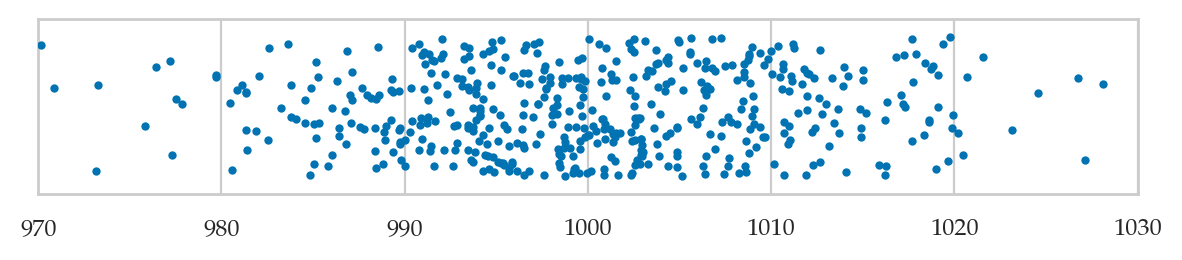

In [5]:
np.random.seed(3)
ksample = rvK.rvs(500)

with plt.rc_context({"figure.figsize":(6,1.4)}):
    fig, ax = plt.subplots()
    sns.stripplot(x=ksample, ax=ax, jitter=0.4, s=3)
    ax.set_xlim(*xlims)
    filename = os.path.join(DESTDIR, "example_draws_from_normal_mu1000_sigma10.pdf")
    savefigure(fig, filename)

Saved figure to figures/prob/intro/example_normal_mu1000_sigma10.pdf
Saved figure to figures/prob/intro/example_normal_mu1000_sigma10.png


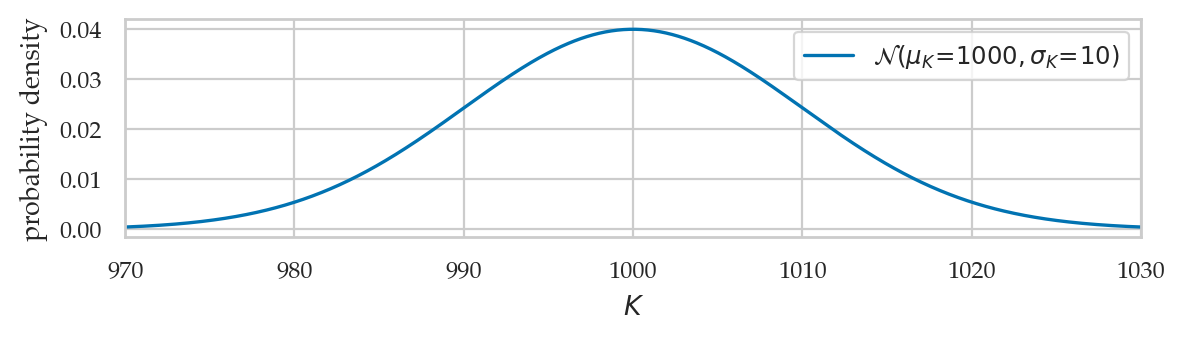

In [6]:
from ministats import plot_pdf

with plt.rc_context({"figure.figsize":(6,1.8)}):
    fig, ax = plt.subplots()
    plot_pdf(rvK, rv_name="K", xlims=xlims, ax=ax, label=r"$\mathcal{N}(\mu_K\!=\!1000,\sigma_K\!=\!10)$")
    ax.set_xlabel("$K$")
    ax.set_ylabel("probability density")
    ax.set_xlim(*xlims)
    ax.set_yticks([0,0.01,0.02,0.03,0.04])
    filename = os.path.join(DESTDIR, "example_normal_mu1000_sigma10.pdf")
    savefigure(fig, filename)

## Chapter intro 3x2 panel of prob. model examples

Saved figure to figures/prob/intro/prob_models_examples_panel.pdf
Saved figure to figures/prob/intro/prob_models_examples_panel.png


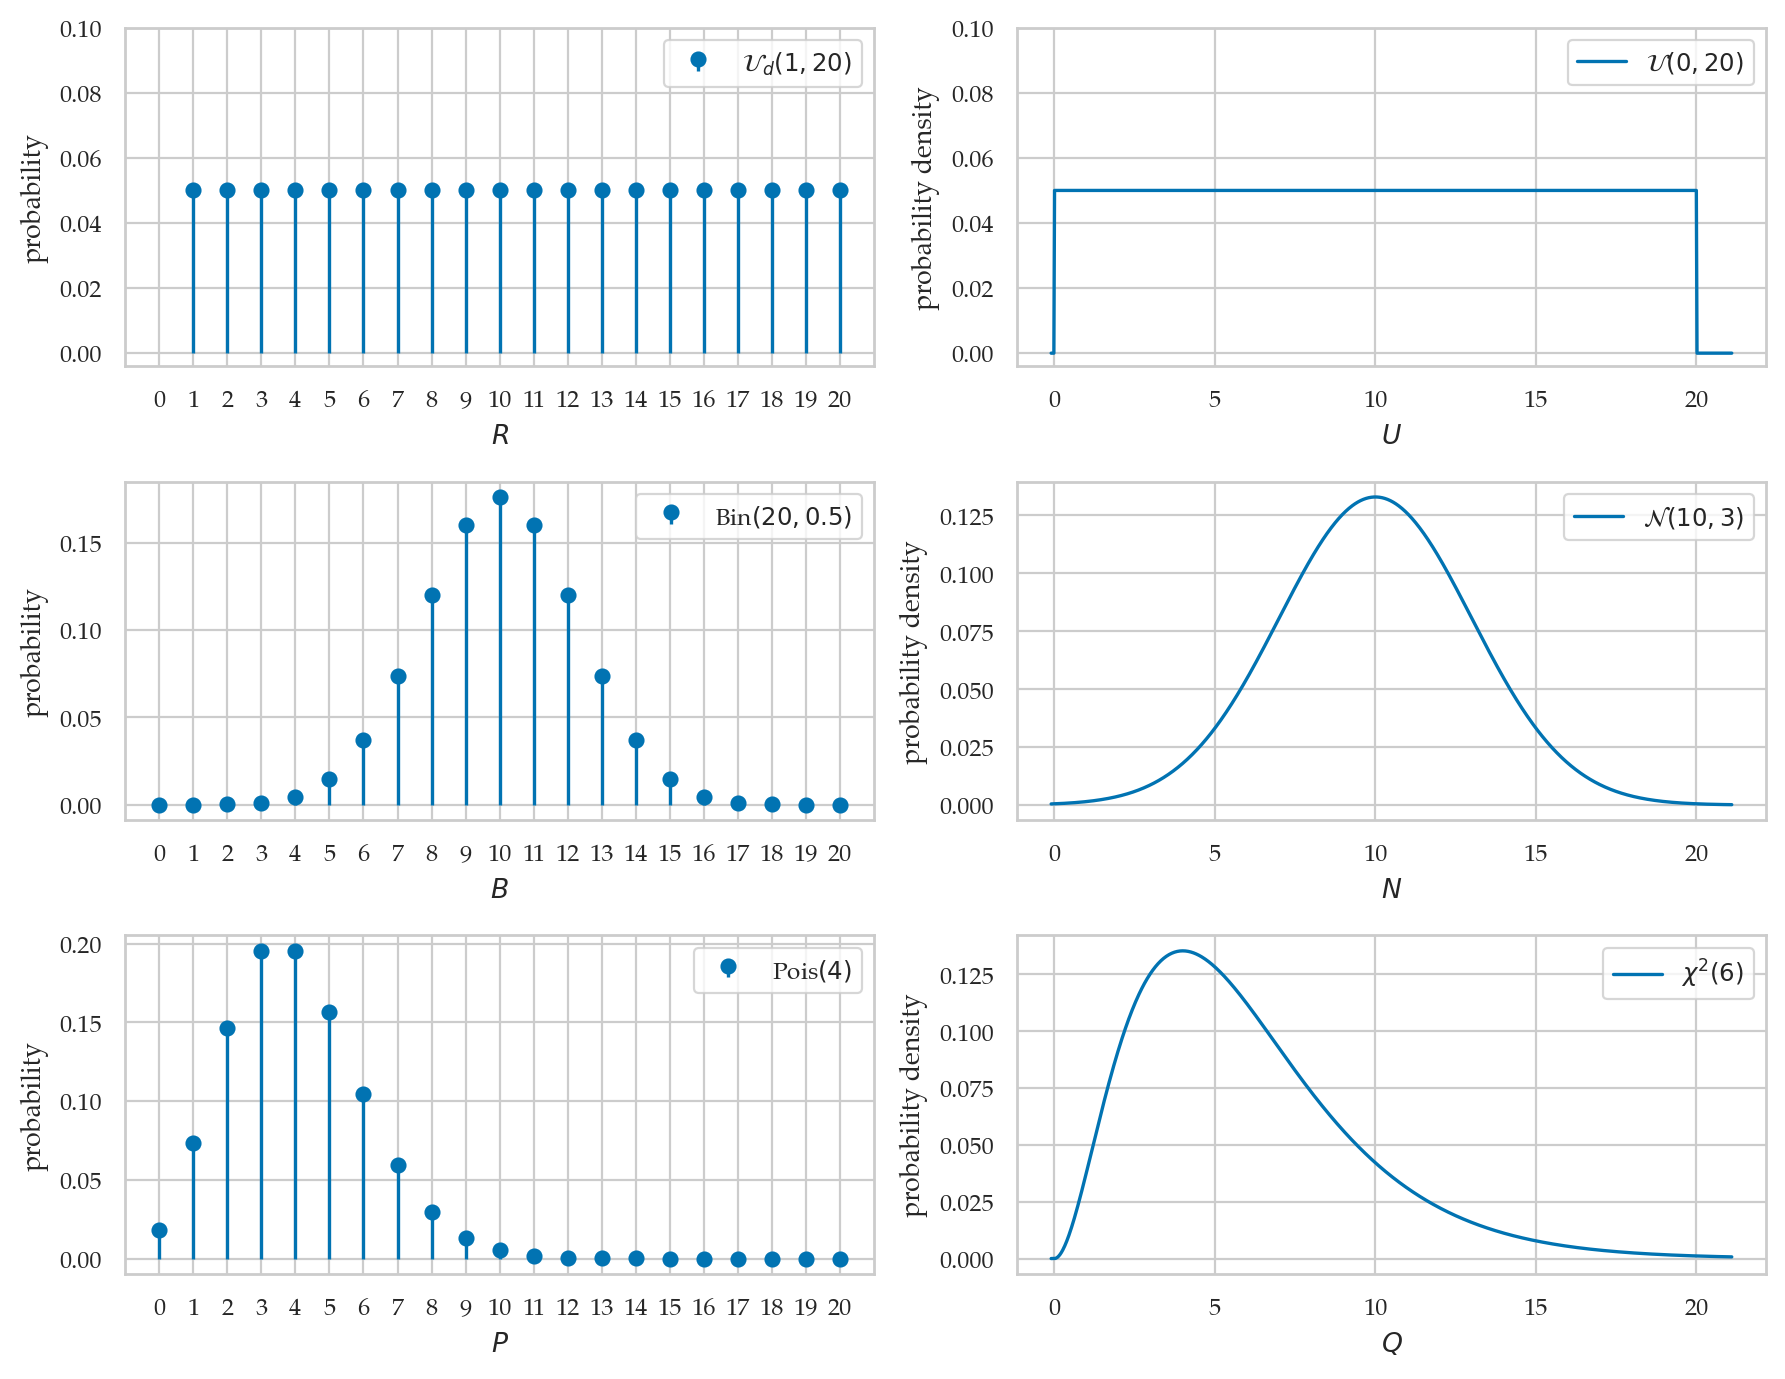

In [7]:
from ministats import plot_pmf, plot_pdf

from scipy.stats import randint
from scipy.stats import binom
from scipy.stats import poisson

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2


with plt.rc_context({"figure.figsize":(9,7)}):
    fig, axs = plt.subplots(3,2) # ,sharex=True)

    # Discrete distributions
    rvR = randint(1, 20+1)
    plot_pmf(rvR, rv_name="R", xlims=[0,21], ylims=[-0.004,0.1], ax=axs[0,0], label=r"$\mathcal{U}_d(1,20)$")
    axs[0,0].set_xlabel("$R$")
    axs[0,0].set_ylabel("probability")

    rvB = binom(20, 0.5)
    plot_pmf(rvB, rv_name="B", xlims=[0,21], ax=axs[1,0], label="Bin$(20,0.5)$")
    axs[1,0].set_xlabel("$B$")
    axs[1,0].set_ylabel("probability")

    rvP = poisson(4)
    plot_pmf(rvP, rv_name="P", xlims=[0,21], ax=axs[2,0], label="Pois$(4)$")
    axs[2,0].set_xlabel("$P$")
    axs[2,0].set_ylabel("probability")


    # Continuous distributions
    rvU = uniform(0, 20)
    plot_pdf(rvU, rv_name="U", xlims=[-0.1,21.1], ylims=[-0.004,0.1], ax=axs[0,1], label=r"$\mathcal{U}(0,20)$")
    axs[0,1].set_xlabel("$U$")
    axs[0,1].set_ylabel("probability density")

    rvN = norm(10,3)
    plot_pdf(rvN, rv_name="N", xlims=[-0.1,21.1], ax=axs[1,1], label=r"$\mathcal{N}(10,3)$")
    axs[1,1].set_xlabel("$N$")
    axs[1,1].set_ylabel("probability density")

    rvX2 = chi2(6)
    plot_pdf(rvX2, rv_name="X2", xlims=[-0.1,21.1], ax=axs[2,1], label=r"$\chi^2(6)$")
    axs[2,1].set_xlabel("$Q$")
    axs[2,1].set_ylabel("probability density")

    filename = os.path.join(DESTDIR, "prob_models_examples_panel.pdf")
    savefigure(fig, filename)

In [8]:
DESTDIR = "figures/prob/discrete"  # where to save figures

## Definitions

### Generic discrete distribution

This is the inspiration for the hand-drawn distribution
shown in the definitions subsection in Section 2.1.

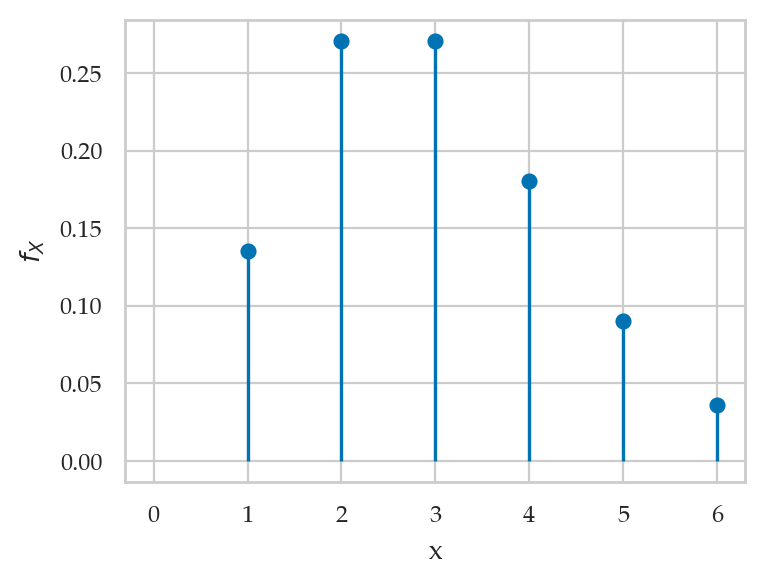

In [9]:
from ministats import plot_pmf
from scipy.stats import poisson

with plt.rc_context({"figure.figsize":(4,3)}):
    fig, ax = plt.subplots()
    rvX = poisson(2,loc=1)
    plot_pmf(rvX, rv_name="X", xlims=[0,6+1], ax=ax)

In [10]:
# highlight region containing f_X(3) and f_X(4)
# currently done manually
# TODO: do using code

### Examples

#### Example 1: coin flip

Consider the random variable $C$ that describes the outcome of a coin flip for a balanced (fair) coin.
The sample space for the random variable $C$ is $\{\texttt{heads}, \texttt{tails}\}$.

The probability mass function is
$$
    f_C(\texttt{heads}) = 0.5
    \quad
    \textrm{and}
    \quad
    f_C(\texttt{tails}) = 0.5.
$$

In [11]:
# define the probability mass function for the random variable C
def fC(c):
    if c in {"heads", "tails"}:
        return 1/2
    else:
        return 0

In [12]:
# print the values of the probability mass function
for c in ["heads", "tails"]:
    print(c, fC(c))

heads 0.5
tails 0.5


Draw the pmf ...

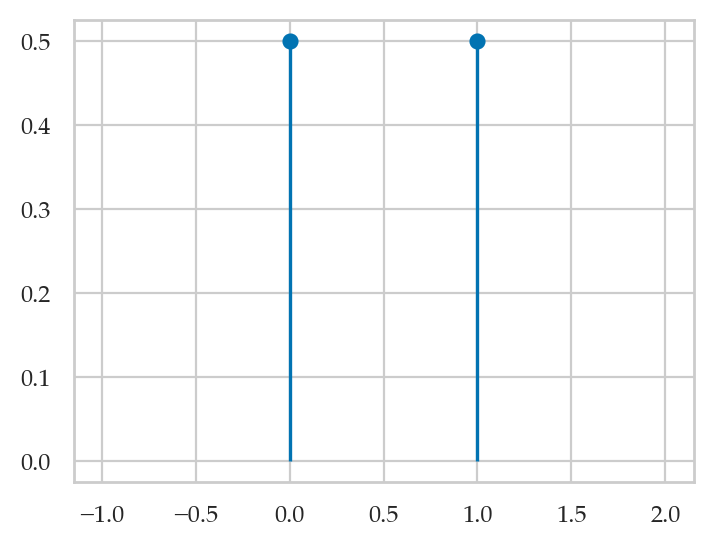

In [13]:
from scipy.stats import randint

rvC = randint(0,1+1)

cs = np.arange(-1,2+1)
fCs = rvC.pmf(cs)
fCs = np.where(fCs == 0, np.nan, fCs)  # set zero fXs to np.nan


with plt.rc_context({"figure.figsize":(4,3)}):
    plt.stem([-1,0,1,2], fCs, basefmt=" ")

#### Example 2: rolling a six-sided die

The random outcome that occurs when we roll a six-sided die can be described as a random variable $D$
which has the sample space $\{1, 2, 3, 4, 5, 6\}$.
If we assume the die is fair,
then each of the outcomes will have equal weight,
so the probability mass function $f_D$ has the following values:

$$
    f_D(1)\!=\!\tfrac{1}{6},
    \ 
    f_D(2)\!=\!\tfrac{1}{6},
    \ 
    f_D(3)\!=\!\tfrac{1}{6},
    \ 
    f_D(4)\!=\!\tfrac{1}{6},
    \ 
    f_D(5)\!=\!\tfrac{1}{6},
    \ 
    f_D(6)\!=\!\tfrac{1}{6}.
$$

In [14]:
# define the probability mass function for the random variable D
def fD(d):
    if d in {1,2,3,4,5,6}:
        return 1/6
    else:
        return 0

In [15]:
# print the values of probability mass function
for d in range(1,6+1):
    print(d, fD(d))

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


Note the Python function `range(a,b)` is equivalent to the list of values `[a,a+1,a+2,...,b-1]` and does not include the upper limit `b`.
If we want to have a range of values that includes `b` we use
`range(a,b+1)` which produces `[a,a+1,a+2,...,b-1,b]`.
You'll see this `+1` added in numerous code examples below.

Draw the pmf ...

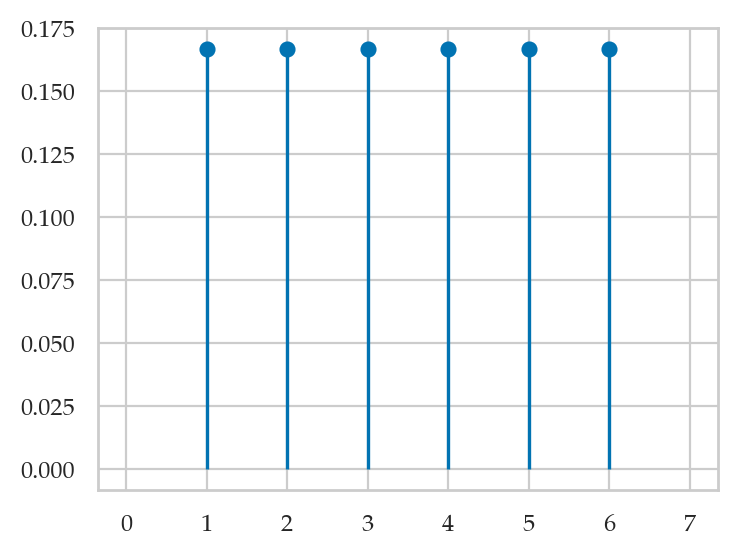

In [16]:
from scipy.stats import randint

rvD = randint(1,6+1)

ds = np.arange(0,7+1)
fDs = rvD.pmf(ds)
fDs = np.where(fDs == 0, np.nan, fDs)  # set zero fDs to np.nan

with plt.rc_context({"figure.figsize":(4,3)}):
    plt.stem(range(0, 7+1), fDs, basefmt=" ")

#### Example 3: hard disk failures

We can model the number of hard disk failures expected to occur in a given data centre as a random variable $H$ distributed according to the Poisson distribution.
$$
    f_H(h) = \frac{\lambda^{h}e^{-\lambda }}{h!}, \ \ \textrm{for }  h \in \{0, 1, 2, 3, \ldots \},
$$

where $\lambda$ is a parameter of the distribution.

In this example, we know parameter is $\lambda = 20$,
which we'll denote as `lam = 20` in Python.

The probability mass function for the random variable $H \sim \textrm{Pois}(\lambda=20)$ is computed using the following Python function `fH`.

In [17]:
import numpy as np
import math

def fH(h):
    lam = 20
    return lam**h * np.exp(-lam) / math.factorial(h)

We can use the function `fH` to compute the probability of simple outcomes like $\{H=23\}$.

In [18]:
fH(23)

0.06688147366240181

The probability of an event is the sum of the probabilities of the individual outcomes.
To compute the probability of the event $\{18 \leq H \leq 22\}$,
we use the following Python expression:

In [19]:
sum([fH(h) for h in range(18,22+1)])

0.4235829452013518

The code below verifies that the Python function `fH` satisfies Kolmogorov's second axiom,
which demands that the total probability must be one:
$\sum_{h=0}^{h=\infty} f_H(h) = 1$.

In [20]:
sum([fH(h) for h in range(0,100+1)])

1.0

Note we calculated the summation only until $h=100$ and not until $h=\infty$.
In general,
it's it's not possible to do summation until infinity on computers.
Stopping the summation at $h=100$ is okay in this case,
because the probability values $f_H(101)$, $f_H(102)$, etc. are very small numbers,
`fH(101) = 5.544e-38` which is a negligible number,
when added to the answer `1.0`.

In [21]:
1.0 + fH(101)

1.0

Saved figure to figures/prob/discrete/prob_distr_plot_hard_disk_failures.pdf
Saved figure to figures/prob/discrete/prob_distr_plot_hard_disk_failures.png


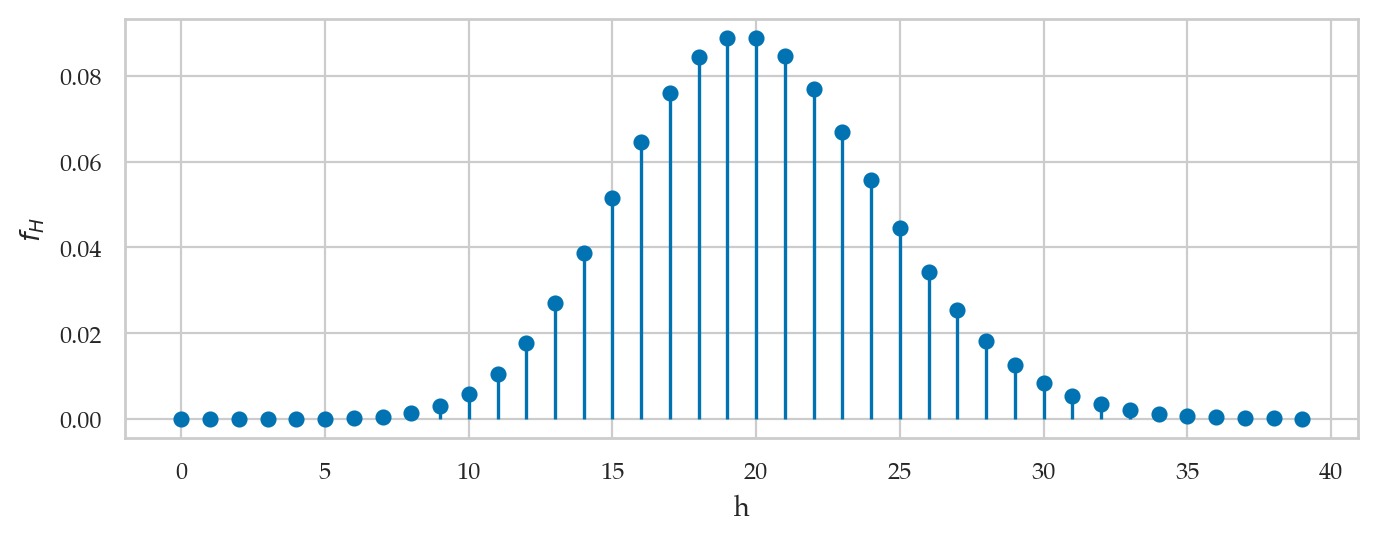

In [22]:
# use poisson model to generate pmf graph
from scipy.stats import poisson
rvH = poisson(20)
hs = np.arange(0, 40)
fHs = rvH.pmf(hs)

with plt.rc_context({"figure.figsize":(7,2.8)}):
    fig, ax = plt.subplots()
    ax.stem(fHs, label="pmf of $H$", basefmt=" ")
    ax.set_xlabel('h')
    ax.set_ylabel('$f_H$')
    # ax.legend()
    filename = os.path.join(DESTDIR, "prob_distr_plot_hard_disk_failures.pdf")
    savefigure(fig, filename)

## Cumulative distribution function

The cumulative distribution is the sum of the probability mass function up to given value $b$:

$$
   F_H(b) = \textrm{Pr}(H \leq b) = \sum_{h=0}^{h=b} f_H(h).
$$


In [23]:
def FH(b):
    return sum([fH(h) for h in range(0,b+1)])

Saved figure to figures/prob/discrete/prob_distr_CDF_plot_hard_disk_failures.pdf
Saved figure to figures/prob/discrete/prob_distr_CDF_plot_hard_disk_failures.png


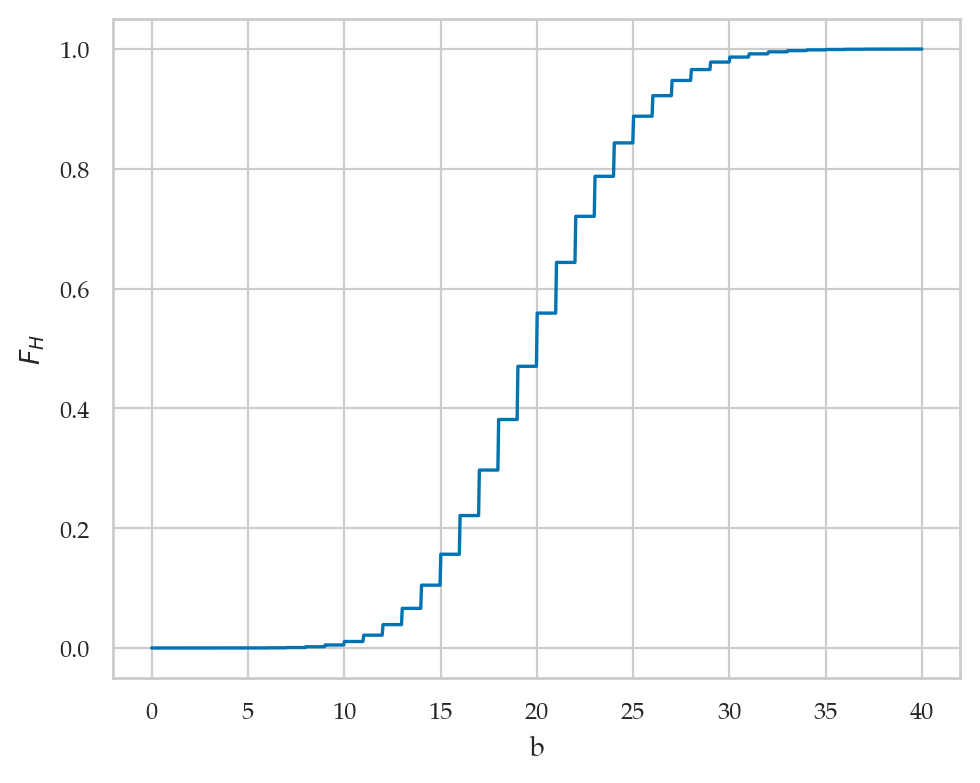

In [24]:
hs = np.linspace(0, 40, 1000)
FHs = rvH.cdf(hs)

# # ALT. we can compute the CDF FH manually
# def FH(b):
#     b = int(b)
#     return sum([fH(h) for h in range(0,b+1)])
# FHs = np.vectorize(FH)(hs)

with plt.rc_context({"figure.figsize":(5,4)}):
    ax = sns.lineplot(x=hs, y=FHs)
    ax.set_xlabel('b')
    ax.set_ylabel('$F_H$')
    # ax.legend()
    filename = os.path.join(DESTDIR, "prob_distr_CDF_plot_hard_disk_failures.pdf")
    savefigure(ax, filename)

In [25]:
FH(22) - FH(18-1)

0.42358294520135187

Saved figure to figures/prob/discrete/prob_distr_inverseCDF_plot_hard_disk_failures.pdf
Saved figure to figures/prob/discrete/prob_distr_inverseCDF_plot_hard_disk_failures.png


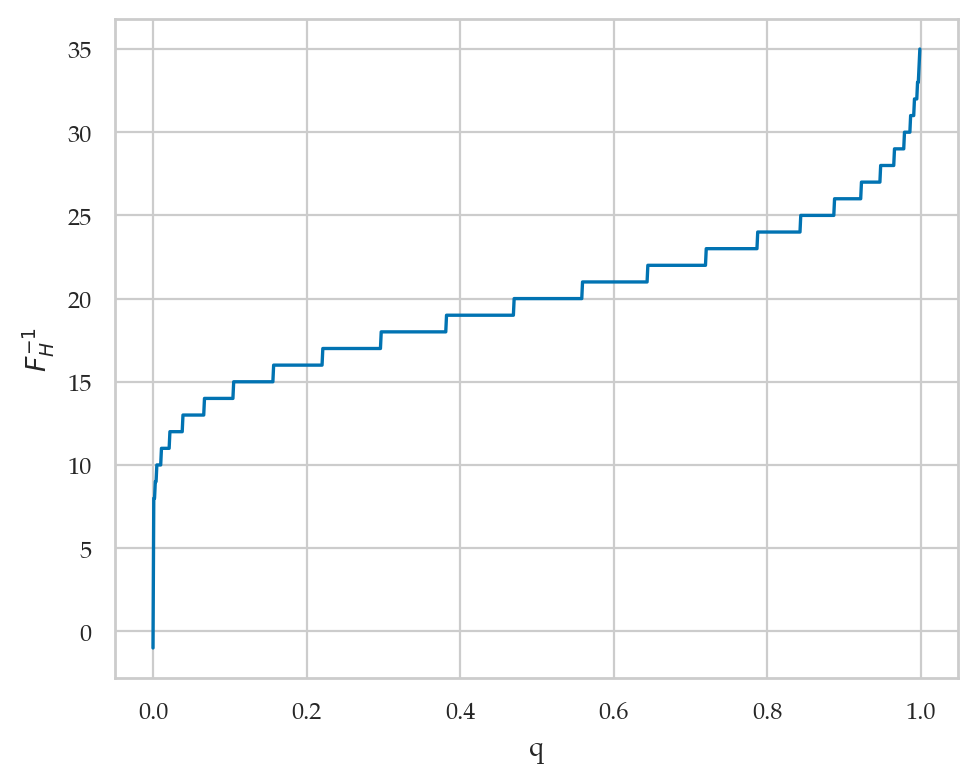

In [26]:


qs = np.linspace(0, 1, 1000)
invFHs = rvH.ppf(qs)

with plt.rc_context({"figure.figsize":(5,4)}):
    ax = sns.lineplot(x=qs, y=invFHs)
    ax.set_xlabel('q')
    ax.set_ylabel('$F_H^{-1}$')
    # ax.legend()
    filename = os.path.join(DESTDIR, "prob_distr_inverseCDF_plot_hard_disk_failures.pdf")
    savefigure(ax, filename)

### Visual exercise



Saved figure to statsprobsfigs/prob/exercise_unlabelled_pmf_plot.pdf
Saved figure to statsprobsfigs/prob/exercise_unlabelled_pmf_plot.png


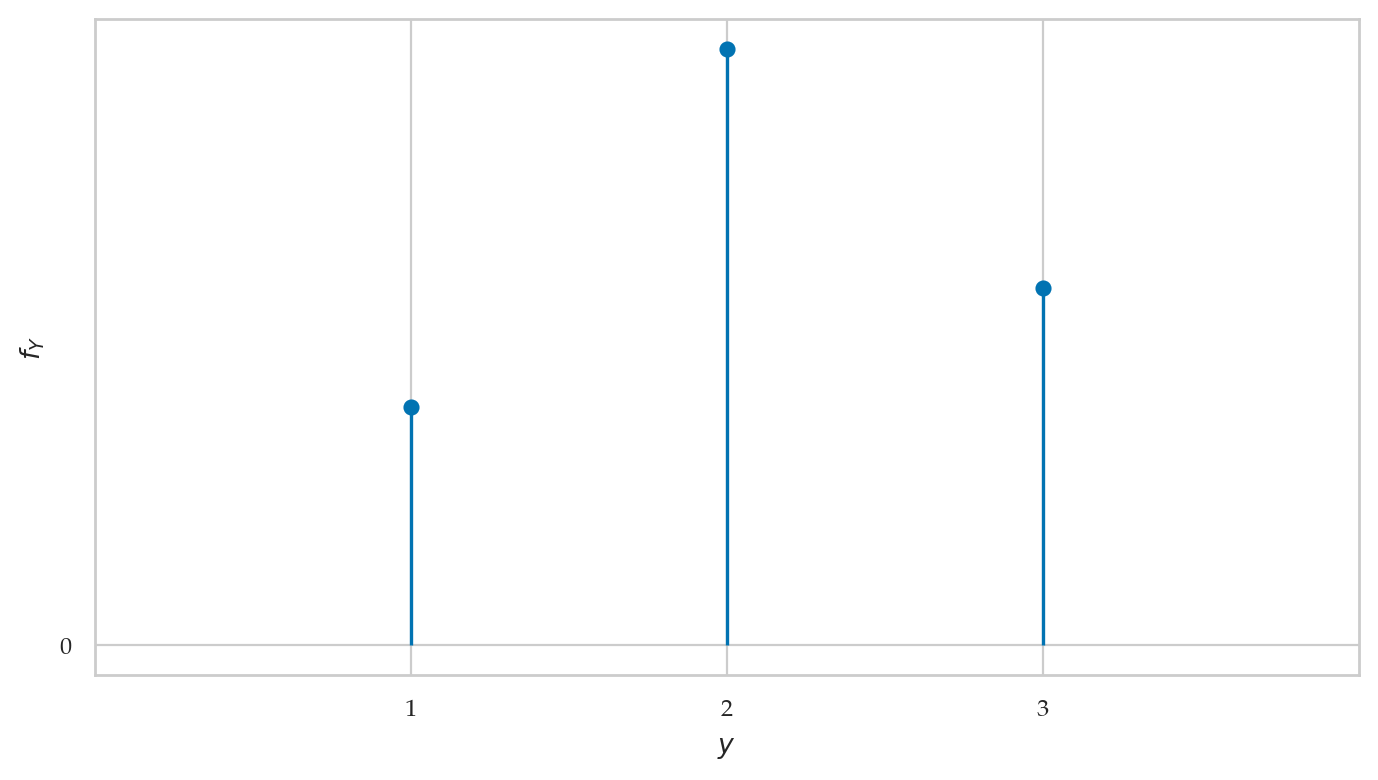

In [27]:
ys = [1,2,3]
fYs = [0.2, 0.5, 0.3]

fig, ax = plt.subplots()
plt.stem(ys, fYs, basefmt=" ")
ax.set_xticks([1,2,3])
ax.set_xlim(0,4)
ax.set_yticks([0])
ax.set_xlabel('$y$')
ax.set_ylabel('$f_Y$')
filename = os.path.join("statsprobsfigs/prob", "exercise_unlabelled_pmf_plot.pdf")
savefigure(fig, filename)

## Expectation value calculations

### Example 4: expected winnings from the die game


In [28]:
def w(d):
    if d == 6:
        return 5
    else:
        return 0

In [29]:
# expected value of w(D)
sum([w(d)*fD(d) for d in range(1,6+1)])

0.8333333333333333

### Example 5: mean and variance of six-sided die


#### Mean

The formula for the mean is given by:
$$
  \mu_D \ = \ \mathbb{E}_D[D] \ = \ \sum_{d=1}^{d=6}  d \!\cdot\! f_{D}(d) 
  \ = \ 1\!\cdot\!\tfrac{1}{6} + 2\!\cdot\!\tfrac{1}{6} + 3 \!\cdot\! \tfrac{1}{6}
        + 4 \!\cdot\! \tfrac{1}{6} + 5 \!\cdot\! \tfrac{1}{6} + 6 \!\cdot\! \tfrac{1}{6}
  = \tfrac{21}{6}.
$$

In code, this gives:

In [30]:
sum([d*fD(d) for d in range(1,6+1)])

3.5

So the mean is $\mu_D = \frac{21}{6} = 3.5$.

#### Variance

The formula for the variance is
$$
    \sigma_D^2
        = \mathbb{E}_D\!\left[ (D-\mu_D)^2 \right]
        = \sum_{d=1}^{6} \; (d-3.5)^2 \! \cdot \! f_D(d).
$$

In code, this gives:

In [31]:
sum([(d-3.5)**2 * fD(d) for d in range(1,7)])

2.9166666666666665

So the variance of $D$ is $\sigma_D^2 = 2.91\overline{6}$.

We can compute the standard deviation $\sigma_D$ by taking the square root of the variance.

In [32]:
import numpy as np
np.sqrt(2.9166666666666665)

1.707825127659933

### Example 6: mean and variance of hard disks failures


#### Mean

The formula for the mean is given by:
$$
  \mu_H \ = \ \mathbb{E}_H[H] = \sum_{h=0}^{\infty}  h \cdot f_{H}(h).
$$

In code, we'll use the upper limit of $h=100$ instead of $h$ all the way to infinity.

In [33]:
sum([h*fH(h) for h in range(0,100+1)])

20.0

So the mean is $\mu_H = 20.0$.
Indeed, this is what we expect since we constructed this random variable with mean parameters $\lambda=20$.

#### Variance

The formula for the variance is
$$
    \sigma_H^2
        = \mathbb{E}_H\!\left[ (H-\mu_H)^2 \right]
        = \sum_{h=0}^{\infty} (h-20)^2 \cdot f_H(h).
$$

In [34]:
sum([(h-20)**2 * fH(h) for h in range(0,100)])

19.999999999999996

Due to numerical rounding errors in the above computation, we end up with a number that differs (in the 15th decimal) from the correct answer $20$.
The variance of $H$ is $\sigma_H^2 = 20.0$.

We can compute the standard deviation $\sigma_H$ by taking the square root of the variance.

In [35]:
import numpy as np
np.sqrt(20)

4.47213595499958

Intuitively, the $\sigma_H$ tells us the width of distribution is approximately 5,
and the most likely outcomes will be in the interval
$[\mu_H - \sigma_H, \mu_H + \sigma_H] = [15, 25]$.

### Solution to plot $F_D$ exercise

Saved figure to statsprobsfigs/prob/prob_distr_CDF_plot_die_roll.pdf
Saved figure to statsprobsfigs/prob/prob_distr_CDF_plot_die_roll.png


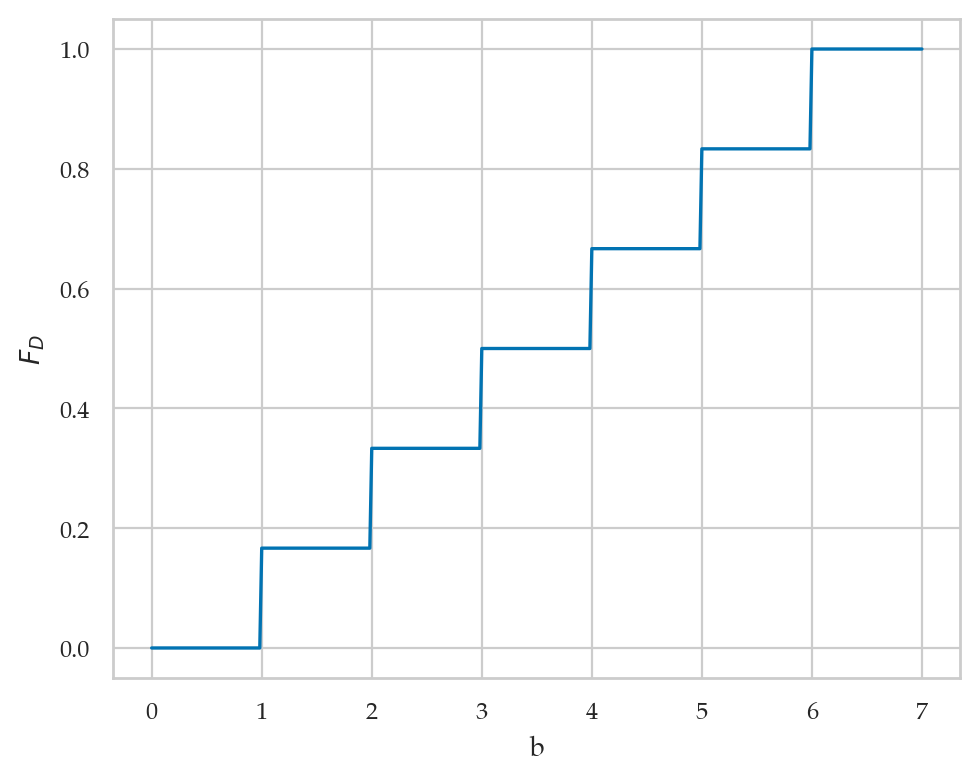

In [36]:
from scipy.stats import randint

rvD = randint(1, 6+1)
ds = np.linspace(0, 7, 400)
FDs = rvD.cdf(ds)

with plt.rc_context({"figure.figsize":(5,4)}):
    ax = sns.lineplot(x=ds, y=FDs)
    ax.set_xlabel('b')
    ax.set_ylabel('$F_D$')
    # ax.legend()
    filename = os.path.join("statsprobsfigs/prob", "prob_distr_CDF_plot_die_roll.pdf")
    savefigure(ax, filename)

<a name="computer_models"></a>

## Computer models for random variables

- `<model>`: the family of probability distributions
  - Examples: `randint`, `poisson`, `uniform`, `norm`, etc.
- `<params>`: parameters of the model—specific value of the control knobs we choose to create a particular distribution
  - Examples: `alpha`,`beta`,`lam`, `mu`, `sigma`, etc.
- `<model>(<params>)`: the probability model from the family `<model>` initialized with parameters `<params>`
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \mathcal{M}(\theta)$ means the random variable $X$
  is distributed according to the probability model $\mathcal{M}$ with parameters $\theta$.


### Examples of probability models and their computer implementations

- The discrete uniform family of distribution $\mathcal{U}_d(\alpha,\beta)$
  assigns equal probabilities to all outcomes in the range $[\alpha, \alpha+1, \ldots, \beta]$.
  To create a computer model for a discrete uniform distribution,
  use the code `randint(alpha, beta+1)`,
  where `alpha` and `beta` are two integers.
  - Examples 2: we can model the outcome of a six-sided die roll $D \sim \mathcal{U}_d(1,6)$ as `rvD = randint(1,6+1)`.
- The Poisson family of distribution $\textrm{Pois}(\lambda)$
  describes the count of occurrences when the average rate is $\lambda$.
  To create a computer model for a Poisson random variable
  use the code `poisson(lam)`,
  where `lam` (short for *lambda*) describes the expected number of occurrences.
  - Examples 3: we can model the number of hard disk failures $H \sim \textrm{Pois}(20)$ as `rvH = poisson(20)`.
- The continuous uniform family of distribution $\mathcal{U}(\alpha,\beta)$,
  which assigns equal probabilities to all outcomes in the interval $[\alpha,\beta]$.
  To create a computer model for a continuous uniform distribution,
  use the code `uniform(alpha, beta)`,
  where `alpha` and `beta` are two floats.
- The normal family of distribution $\mathcal{N}(\mu,\sigma)$ corresponds to
  a bell-shaped curve centred at $\mu$ whose width is proportional to $\sigma$.
  To create a computer model for a normal random variable
  use the code `norm(mu, sigma)`,
  where `mu` is the mean and `sigma` is the standard deviation.


## Hard disks example

Let's now work through a detailed example to show how the computer model for the Poisson variable
can help us do all kinds of computations with relevance to the real-world.

The first thing we'll do is import the `poisson` model from `scipy.stats` 
and create a random variable object `rvH` by initializing the Poisson model with parameter $\lambda = 20$.

In [37]:
# import the poisson model
from scipy.stats import poisson

# create a Poisson random variable with mean parameter 20
rvH = poisson(20)

The methods on the random variable object `rvH`' will allow you to do anything you might want to do with the random variable $H$, as we'll now see...

In [38]:
# what type of object is rvH?
type(rvH)

scipy.stats._distn_infrastructure.rv_discrete_frozen

The above line tells us some information about the internal implementation of the Python object `rvH`,
which is the Python implementation of the random variable $H \sim \textrm{Pois}(20)$.
The `rvH` object is an instance of the class `rv_frozen` (frozen random variable).
Ignore the frozen part. The key part is that it's a random variable.

### Compute probabilities of simple outcomes

In [39]:
rvH.pmf(20)

0.0888353173920848

In [40]:
rvH.pmf(21)

0.08460506418293791

In [41]:
rvH.pmf(22)

0.07691369471176195

### Properties of the distribution

In [42]:
rvH.mean()

20.0

In [43]:
rvH.std()

4.47213595499958

In [44]:
np.sqrt( rvH.var() )  # = rvH.std()

4.47213595499958

In [45]:
rvH.median()

20.0

In [46]:
# show the sample space the random variable
rvH.support()

(0, inf)

The concept of *support* (of a probability distribution) is a fancy math way to talk about "the interval of values where the probability distribution is non-zero." The above result tells us the support of the random variable `rvH` is all natural numbers $\{0,1,2,3,\ldots\}$.

### Computing probabilities of complex outcomes

Suppose you want to compute the probability of the outcome $\{ a \leq N \leq b \}$
for the random variable $H$.

In [47]:
# Pr({15 <= H <= 25}) = sum of f_H between 15 and 25
sum([rvH.pmf(x) for x in range(15, 25+1)])

0.782950746174042

In [48]:
# Pr({15 <= H <= 25}) = F_H(25) - F_H(14)
rvH.cdf(25) - rvH.cdf(14)

0.7829507461740455

### Plotting the probability mass function

We'll use the `stem` plot from the Matplotlib library to plot probability mass functions
for discrete random variables.

To create a stem-plot of the probability mass function $f_H$, we can use the following three step procedure:
1. create a range of inputs `hs` for the plot
2. compute the value of $f_H$ for each of the inputs and store in an array of values `fHs`
3. plot the values `fHs` using `plt.stem`

If you've never seen this three-step pattern used to generate plots in Python,
you should check out the [Python tutorial notebook](../tutorials/python_tutorial.ipynb),
in particular the section "Plotting function graphs".

Saved figure to figures/prob/discrete/pmf_plot_poisson_mu20.pdf
Saved figure to figures/prob/discrete/pmf_plot_poisson_mu20.png


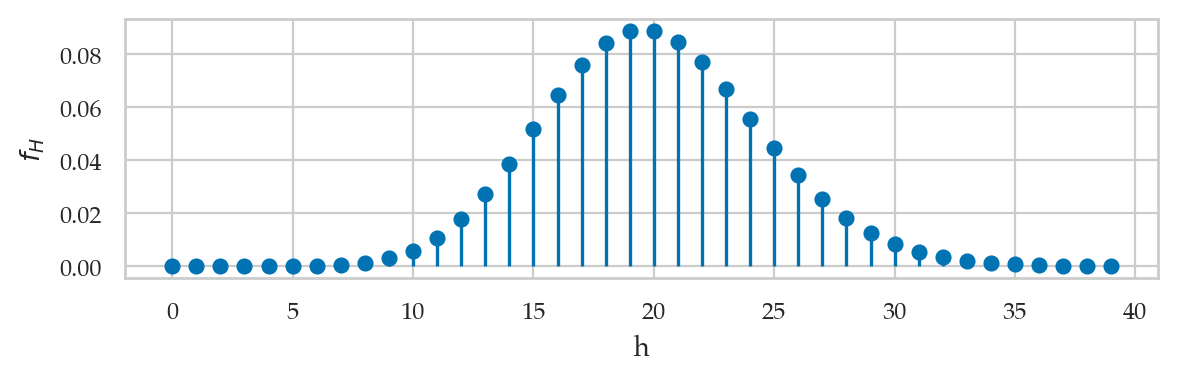

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# 1. array of input values for the plot
hs = np.arange(0, 40)

# 2. compute f_H(h) for each h in hs
fHs = rvH.pmf(hs)

with plt.rc_context({"figure.figsize":(6,2)}):
    fig, ax = plt.subplots()
    ax.stem(fHs, basefmt=" ")
    ax.set_xlabel('h')
    ax.set_ylabel('$f_H$')
    filename = os.path.join(DESTDIR, "pmf_plot_poisson_mu20.pdf")
    savefigure(ax, filename)

Note the graph of the probability mass function corresponds to a discrete set of points,
and is not defined for values in between the integers.
This makes sense,
since we can't have 20.3 hard disk failures—only integers are allowed.

### Computing quantiles

Let's try to find the smallest interval $[0, h_q]$ that contains at least proportion $q$ of the total probability.

For example, the $q=0.95$ quantile is located at...

In [50]:
# find value of h such that Pr({H <= h}) > 0.95
rvH.ppf(0.95)

28.0

In [51]:
# verify that Pr({H <= 28)}) > 0.95
rvH.cdf(28)

0.9656664781059899

Note by choosing $h=28$ we're overshooting the target 0.95 a little bit,
but this is often the case when working with discrete probability distributions.
The previous value at $h=27$ gives `rvH.cdf(27)` $=F_H(27) = 0.9475$,
which is less than 0.95, so we pick $h=28$ as the first value that satisfies $F_H(h) \geq 0.95$.

### Generating random observations

Let's say you want to generate $n=12$ observations from the random variable $H$.
You can do this by calling the method `rvH.rvs(12)`.

In [52]:
rvH.rvs(12)

array([27, 20, 20, 33, 22, 14, 21, 30, 22, 20, 12, 23])

### Computing expectations

Let's say we want to estimate of the total cost we should budget for replacement hard disks, given a base price of \\$200/disk and a bulk discount of \\$150/disk when buying 20 or more disks.

In [53]:
def cost(h):
    if h >= 20:
        return 150*h
    else:
        return 200*h

In [54]:
# expected cost of replacement
sum([cost(h)*rvH.pmf(h) for h in range(0,100+1)])

3381.4219494471417

Another option for computing the expected value is to use the method `rvH.expect()`.
If you try `rvH.expect(cost)` we get an error "*ValueError: The truth value of an array with more than one element is ambiguous.*" This happens because of the way NumPy tries to
evaluate the expression—it will pass in the entire vector of inputs `h` to the function,
and then the expression `h >= 20` causes a problem when `h` is a vector.

In [55]:
# doesn't work!
# rvH.expect(cost)

The code below shows how to convert the function `cost` to a vector-friendly equivalent function `vcost`, which we can ten use in the `rvH.expect` method.

In [56]:
vcost = np.vectorize(cost)
rvH.expect(vcost)

3381.4219494471427

## Discussion

### Bulk of the distribution

We want to find an interval `[a,b]` (a subset of the sample space) that contains 95% of the observations of the random variable $H$. 
In other words, we want to find the integers `a` and `b` such that 
$$
   \sum_{h=a}^{h=b} f_H(h) = f_H(a) + f_H(a+1) + \cdots + f_H(b) \geq 0.95. 
$$

We can obtain this interval by calling the `interval` method on the `rvH` object.

In [57]:
a = rvH.ppf(0.025)
b = rvH.ppf(0.975)
[a, b]

[12.0, 29.0]

In [58]:
a = int(a)  # left boundary `a` as an integer
b = int(b)  # right boundary `b` as an integer
[a,b]

[12, 29]

The interval `[a,b]` should contain at least 0.95 of the probability (the bulk of the distribution).
Let's verify this by computing the sum of $f_H$ for all the values in that interval: $f_H(a) + f_H(a+1) + \cdots + f_H(b)$.

In [59]:
sum([rvH.pmf(h) for h in range(a,b+1)])

0.9567949608871587

Another way to verify that the interval `[a,b]` satisfies the contains-95%-of-the-probability condition is to use the `rvH.cdf` method, since
$$
   \sum_{h=a}^{h=b} f_H(h) = F_H(b) - F_H(a-1).
$$

In [60]:
rvH.cdf(b) - rvH.cdf(a-1)

0.9567949608871623

Saved figure to figures/prob/discrete/pmf_plot_poisson_mu20_bulk.pdf
Saved figure to figures/prob/discrete/pmf_plot_poisson_mu20_bulk.png


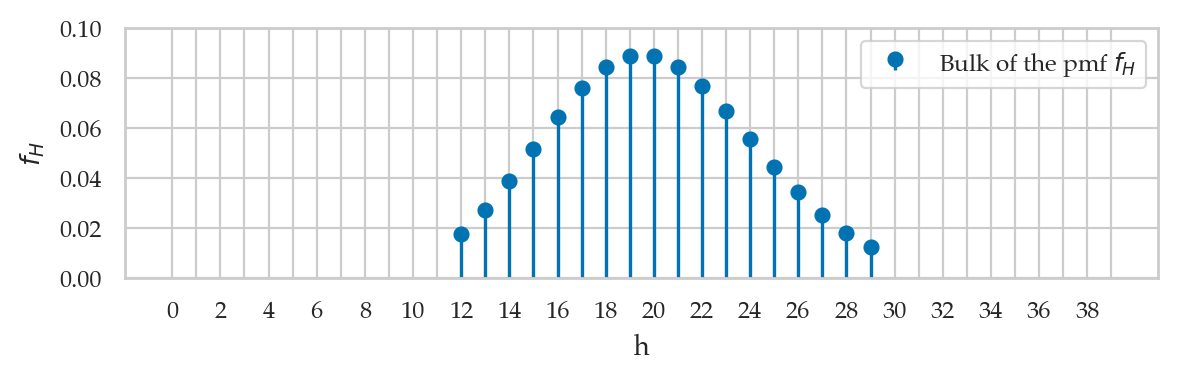

In [61]:
hs = np.arange(0, 40)
fHs = rvH.pmf(hs)

# mask all non-bulk
fHs[0:a] = np.nan
fHs[b+1:] = np.nan

# labels for even integers only
hlabels = np.array(list(map(str,hs)), dtype=object)
hlabels[range(1,40,2)] = None

with plt.rc_context({"figure.figsize":(6,2)}):
    fig, ax = plt.subplots()
    ax.stem(fHs, label="Bulk of the pmf $f_H$", basefmt=" ")
    ax.set_xlabel('h')
    ax.set_ylabel('$f_H$')
    ax.set_ylim([0, 0.1])
    ax.legend()
    ax.set_xticks(hs)
    ax.set_xticklabels(hlabels)
    filename = os.path.join(DESTDIR, "pmf_plot_poisson_mu20_bulk.pdf")
    savefigure(ax, filename)

### Tails of the distribution

Conversely,
the "tails" of the distribution contain the unlikely outcomes for the random variable.
The complement of the interval `[a,b]` contains at most 5% of the probability.

#### Left tail

The left tail is the interval `[0,a-1]` which contains less than 2.5% of the probability.

In [62]:
sum([rvH.pmf(h) for h in range(0,(a-1)+1)])

0.021386821587280218

#### Right tail

The right tail is the interval `[b+1,np.inf]` which also contains less than 2.5% of the probability.

In [63]:
sum([rvH.pmf(h) for h in range(b+1,1000)])

0.0218182175255574

We can verify the combined weight of the two tails is less than 5%.

In [64]:
sum([rvH.pmf(h) for h in range(0,(a-1)+1)]) \
  + sum([rvH.pmf(h) for h in range(b+1,1000)])

0.043205039112837615

Saved figure to figures/prob/discrete/pmf_plot_poisson_mu20_tails.pdf
Saved figure to figures/prob/discrete/pmf_plot_poisson_mu20_tails.png


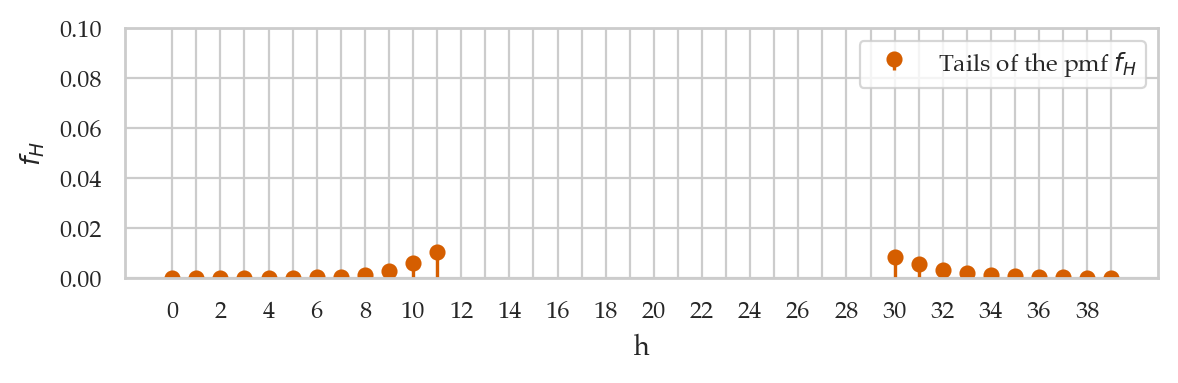

In [65]:
hs = np.arange(0, 40)
fHs = rvH.pmf(hs)

# mask all non-bulk
fHs[a:b+1] = np.nan

# labels for even integers only
hlabels = np.array(list(map(str,hs)), dtype=object)
hlabels[range(1,40,2)] = None

with plt.rc_context({"figure.figsize":(6,2)}):
    fig, ax = plt.subplots()
    ax.stem(fHs, label="Tails of the pmf $f_H$", markerfmt='ro', linefmt='r-', basefmt=" ")
    ax.set_xlabel('h')
    ax.set_ylabel('$f_H$')
    ax.set_ylim([0, 0.1])
    ax.legend()
    ax.set_xticks(hs)
    ax.set_xticklabels(hlabels)
    filename = os.path.join(DESTDIR, "pmf_plot_poisson_mu20_tails.pdf")
    savefigure(ax, filename)